# Sugar Cane Project

## Importing the libraries.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## Reading the csv file.

In [49]:
file1 = pd.read_csv('./DataSets/Data1.csv')

In [50]:
file1.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [51]:
file1.tail()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"
102,102,Syria,Asia,1,0,0,"83.034,2"


In [52]:
file1.sample()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
64,64,Taiwan,Asia,395.8,16788,5.917,"66.896,6"


In [53]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


In [54]:
file1.describe()

,Unnamed: 0
count,103.000000
mean,51.000000
std,29.877528
min,0.000000
25%,25.500000
50%,51.000000
75%,76.500000
max,102.000000


## Data Cleaning

In [55]:
# Removing the unnecessay columns in the dataset.


file1.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [56]:
file1.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


### Dropping the duplicate rows.

In [57]:
# Finding the duplicate rows in the dataset.

file1.duplicated().sum()


# There are no duplicate rows.

0

### Removing or Filling the null values.

In [58]:
# Let's check for the null values in the dataset.

file1.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [59]:
# Let's try to clean the data inside the dataset.

file1['Production (Tons)']=file1['Production (Tons)'].str.replace('.',"")


In [60]:
# Let's convert the data type of coloumn.

file1['Production (Tons)']=file1['Production (Tons)'].astype('float64')

In [61]:
# Let's check the datatype of the column.

file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     103 non-null    object 
 1   Continent                   103 non-null    object 
 2   Production (Tons)           103 non-null    float64
 3   Production per Person (Kg)  103 non-null    object 
 4   Acreage (Hectare)           102 non-null    object 
 5   Yield (Kg / Hectare)        102 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.0+ KB


In [62]:
file1['Production (Tons)'].max()

768678382.0

In [63]:
# Let's Perform the same analysis on other columns.

file1['Production per Person (Kg)'] = file1['Production per Person (Kg)'].str.replace(".", "").str.replace(",",".")
file1['Yield (Kg / Hectare)'] = file1['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")
file1['Acreage (Hectare)'] = file1['Acreage (Hectare)'].str.replace(".","")

In [64]:
# Let's convert them into float datatype.

file1['Production per Person (Kg)'] = file1['Production per Person (Kg)'].astype('float64')
file1['Yield (Kg / Hectare)'] = file1['Yield (Kg / Hectare)'].astype('float64')
file1['Acreage (Hectare)'] = file1['Acreage (Hectare)'].astype('float64')

In [65]:
# Let's check the datatypes of the columns.

file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     103 non-null    object 
 1   Continent                   103 non-null    object 
 2   Production (Tons)           103 non-null    float64
 3   Production per Person (Kg)  103 non-null    float64
 4   Acreage (Hectare)           102 non-null    float64
 5   Yield (Kg / Hectare)        102 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.0+ KB


In [66]:
# Now Let's fill the null values.

file1.head()


,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [67]:
# Drop rows with missing data across all columns
file1 = file1.dropna()

In [68]:
file1.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [69]:
# Let's Reset the index for the dataset.

file1.reset_index(inplace=True)


In [70]:
file1.drop(['index'], axis =1 , inplace = True)

In [71]:
file1.tail()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
97,Spain,Europe,394.0,8.0,9.0,43596.5
98,Lebanon,Asia,97.0,16.0,3.0,28386.4
99,Singapore,Asia,50.0,9.0,2.0,25.0
100,Samoa,Oceania,12.0,6.0,1.0,11949.8
101,Syria,Asia,1.0,0.0,0.0,83034.2


### OUtlier Detection.

In [72]:
# Let's draw some subplots for the float columns.


fc = file1.select_dtypes(include=['number'])
fc

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,768678382.0,3668.531,10226205.0,75167.5
1,348448000.0,260721.000,4950000.0,70393.5
2,123059739.0,88287.000,1675215.0,73459.1
3,87468496.0,1264.303,1336575.0,65442.2
4,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...
97,394.0,8.000,9.0,43596.5
98,97.0,16.000,3.0,28386.4
99,50.0,9.000,2.0,25.0
100,12.0,6.000,1.0,11949.8


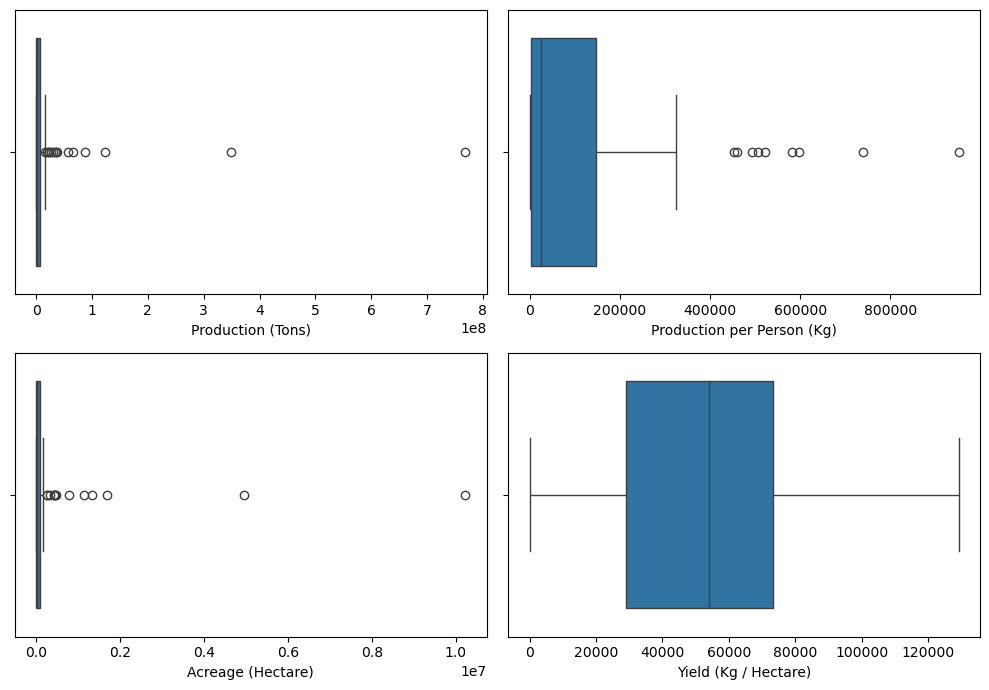

In [73]:
fig = plt.figure(figsize=(10,7))

for i, j in enumerate(fc.columns):
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(x = fc[j])
    plt.xlabel(j)
    
plt.tight_layout()
plt.show()

## Univariate Analysis

### How many countries produce sugar came from each continent.

In [74]:
file1['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

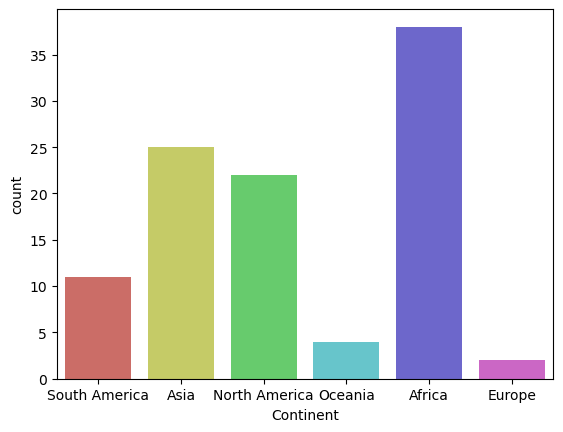

In [75]:
sns.countplot( x= 'Continent', data = file1, hue = 'Continent', palette='hls')
plt.show()

### How many tons each continent produce.

In [76]:
file1.pivot_table(values='Production (Tons)', index='Continent', aggfunc='sum')
# file1.groupby([file1['Continent']])['Production (Tons)'].sum()

,Production (Tons)
Continent,
Africa,89681472.0
Asia,721930425.0
Europe,5823.0
North America,173995947.0
Oceania,36177574.0
South America,865588126.0


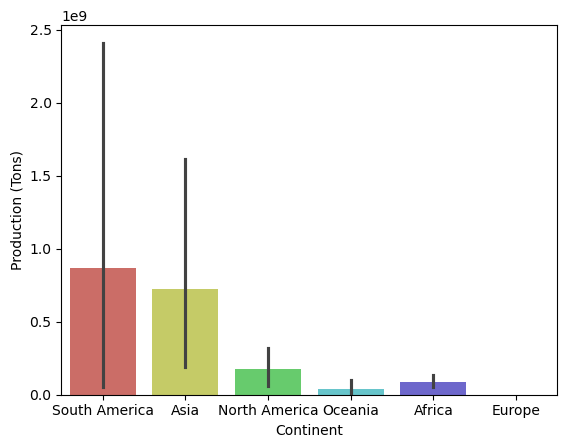

In [77]:
sns.barplot(x = 'Continent', y = 'Production (Tons)', estimator = 'sum', hue = 'Continent', palette='hls', data = file1)
plt.show()

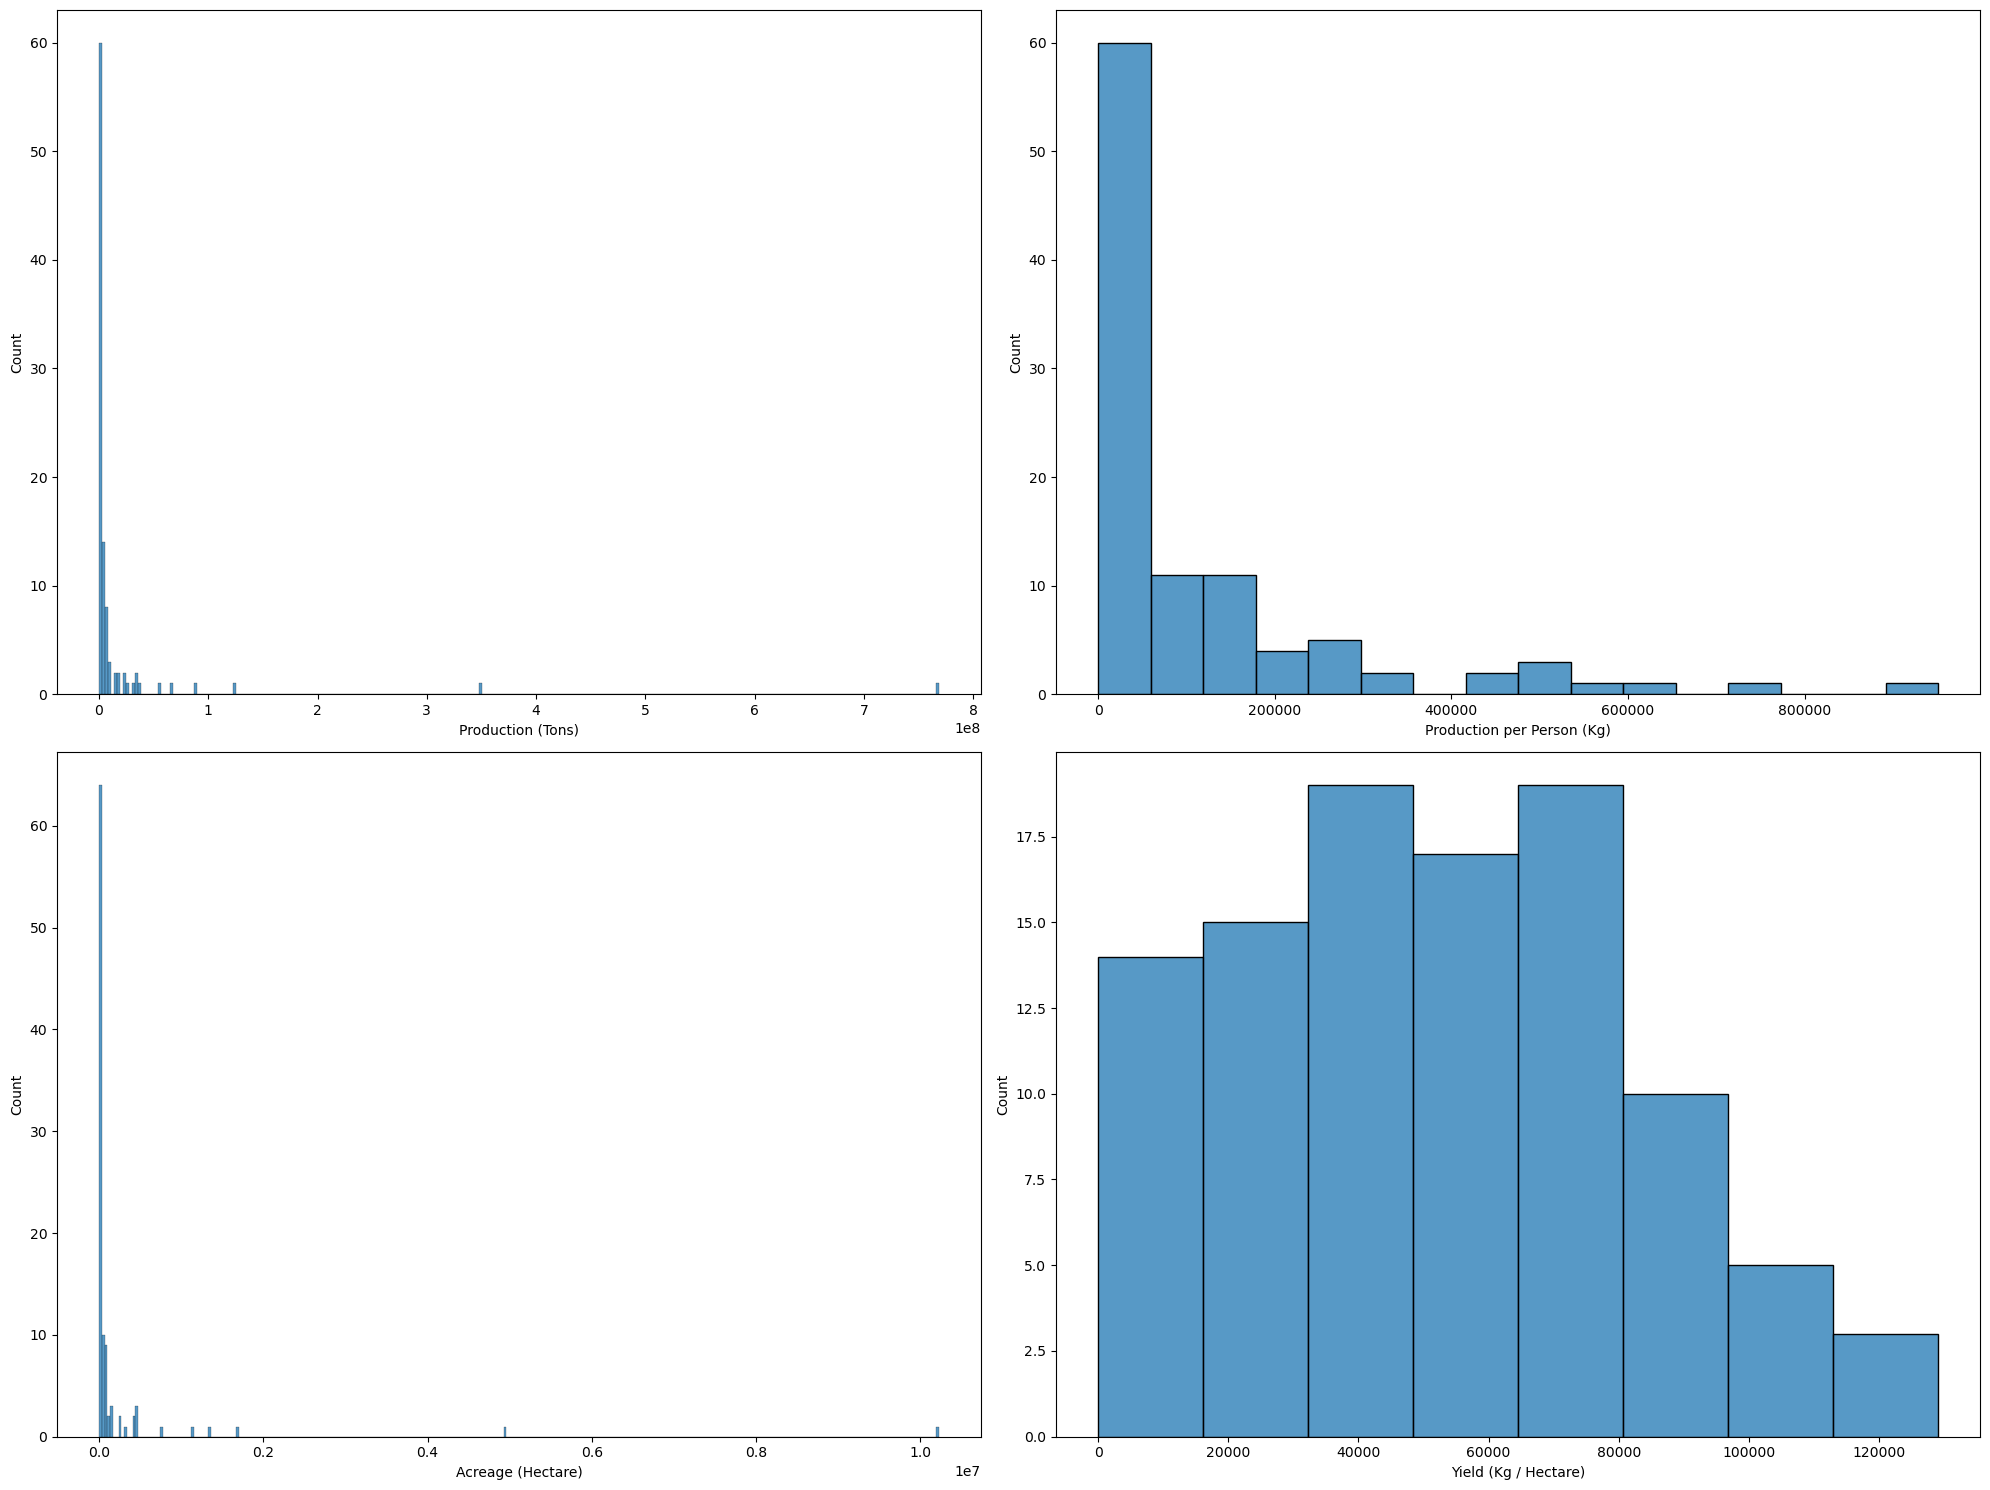

In [78]:
fig = plt.figure(figsize=(20,15))

for i, j in enumerate(fc.columns):
    ax = plt.subplot(2,2,i+1)
    sns.histplot(x = fc[j])
    plt.xlabel(j)
    
plt.tight_layout()
plt.show()

In [79]:
file1.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analysis

### Which Country is producing maximum sugar cane.

In [80]:
file1.pivot_table(values='Production (Tons)', index='Country').sort_values(by='Production (Tons)', ascending=False)

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Singapore,50.0
Samoa,12.0


In [81]:
file1.pivot_table(values='Production (Tons)', index='Country').sort_values(by='Production (Tons)', ascending=False)

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Singapore,50.0
Samoa,12.0


In [82]:
pd.options.display.float_format = '{:.7f}'.format

In [83]:
# Let's Create new columns with the percentage of the production by each country.

file1['Production %'] = (file1['Production (Tons)'] / file1['Production (Tons)'].sum()) * 100

In [84]:
file1.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Production %
0,Brazil,South America,768678382.0000000,3668.5310000,10226205.0000000,75167.5000000,40.7272854
1,India,Asia,348448000.0000000,260721.0000000,4950000.0000000,70393.5000000,18.4620011
2,China,Asia,123059739.0000000,88287.0000000,1675215.0000000,73459.1000000,6.5201380
3,Thailand,Asia,87468496.0000000,1264.3030000,1336575.0000000,65442.2000000,4.6343887
4,Pakistan,Asia,65450704.0000000,324219.0000000,1130820.0000000,57879.0000000,3.4678086


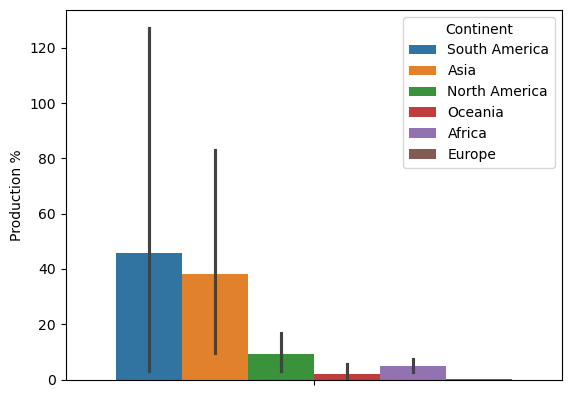

In [85]:
sns.barplot( y = 'Production %', data = file1, hue = 'Continent', estimator = 'sum')
plt.show()

In [86]:
pv2 = file1.pivot_table(values = 'Production %', index = 'Continent', aggfunc='sum')

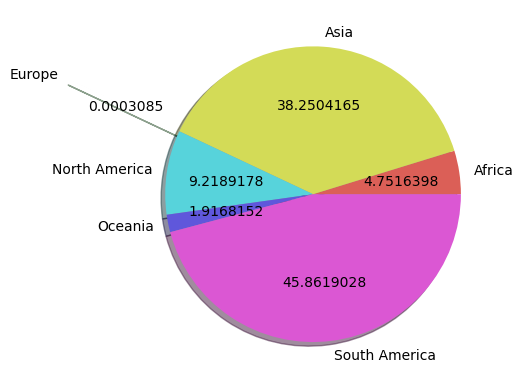

In [87]:
plt.pie(pv2['Production %'], labels = pv2.index, autopct = '%.7f', colors = sns.color_palette('hls'), shadow = True, explode = [0, 0, 0.8, 0, 0, 0,])
plt.show()

### Which Country has the  yield per hector.

In [97]:
pv3 = file1.pivot_table(values='Yield (Kg / Hectare)', index = 'Country', aggfunc = 'sum').sort_values(by = 'Yield (Kg / Hectare)', ascending = False)

In [98]:
pv3

,Yield (Kg / Hectare)
Country,
Guatemala,129049.3000000
Senegal,118085.3000000
Egypt,115030.6000000
Peru,112120.2000000
Malawi,107629.5000000
...,...
Saint Lucia,80.0000000
Trinidad and Tobago,54.0000000
Singapore,25.0000000


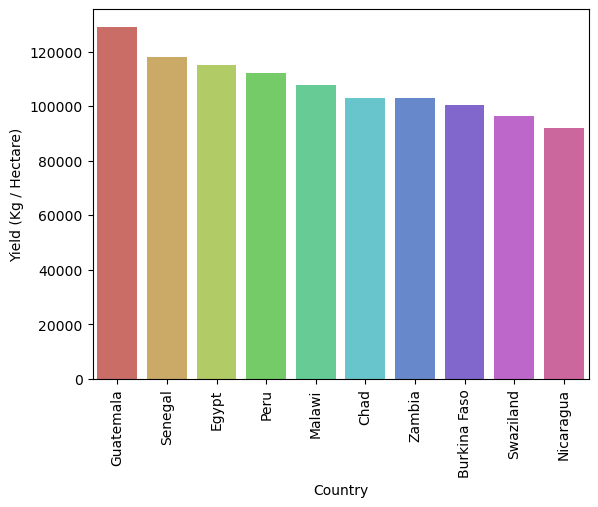

In [107]:
sns.barplot(x = 'Country', y = 'Yield (Kg / Hectare)', data = pv3.head(10), hue = 'Country', palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

 ### Which Country has the highest land.

In [112]:
pv4 = file1.pivot_table(values = 'Acreage (Hectare)', index = 'Country', aggfunc = 'sum').sort_values(by = 'Acreage (Hectare)', ascending = False)
pv4

,Acreage (Hectare)
Country,
Brazil,10226205.0000000
India,4950000.0000000
China,1675215.0000000
Thailand,1336575.0000000
Pakistan,1130820.0000000
...,...
Spain,9.0000000
Lebanon,3.0000000
Singapore,2.0000000


In [108]:
file1.columns

Index(['Country', 'Continent', 'Production (Tons)',
       'Production per Person (Kg)', 'Acreage (Hectare)',
       'Yield (Kg / Hectare)', 'Production %'],
      dtype='object')

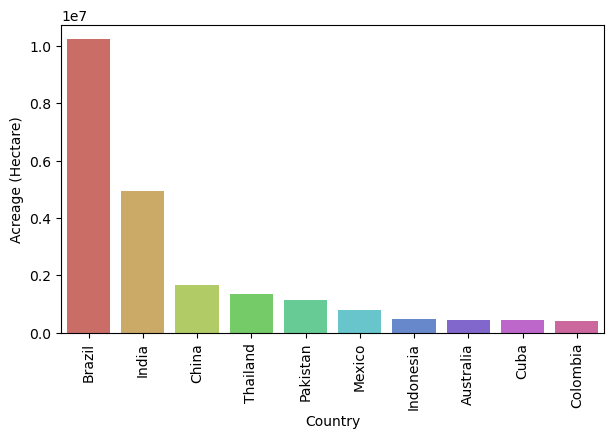

In [117]:
fig = plt.figure(figsize = (7,4))
sns.barplot( x = 'Country', y =  'Acreage (Hectare)', data = pv4.head(10), hue = 'Country', palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Correlation Among the Data.

In [124]:
corr = file1.corr(numeric_only=True)
corr.drop('Production %', axis = 1, inplace = True)
corr

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.0000000,0.0150000,0.9975502,0.1328122
Production per Person (Kg),0.0150000,1.0000000,0.0125574,0.0179988
Acreage (Hectare),0.9975502,0.0125574,1.0000000,0.1134328
Yield (Kg / Hectare),0.1328122,0.0179988,0.1134328,1.0000000
Production %,1.0000000,0.0150000,0.9975502,0.1328122


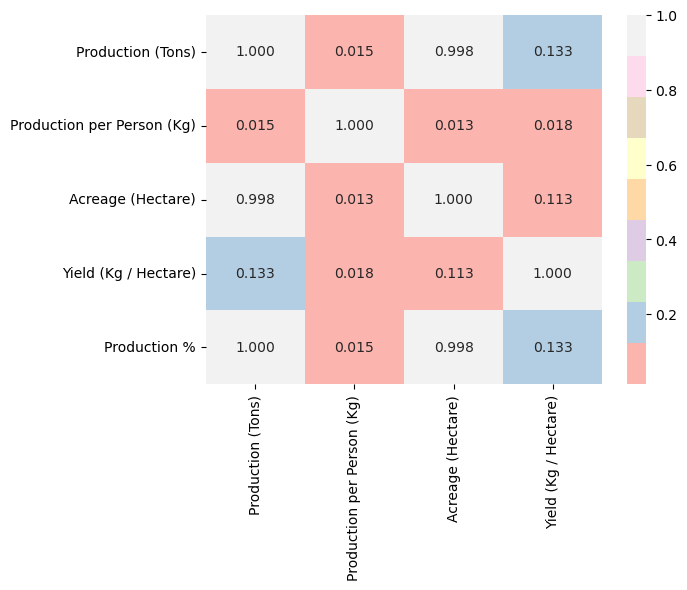

In [143]:
# let's plot a heat map for better understanding.


sns.heatmap(corr, cmap = 'Pastel1', annot = True, fmt = '.3f')
plt.show()

### Do Countries with highest land produce more sugarcane.

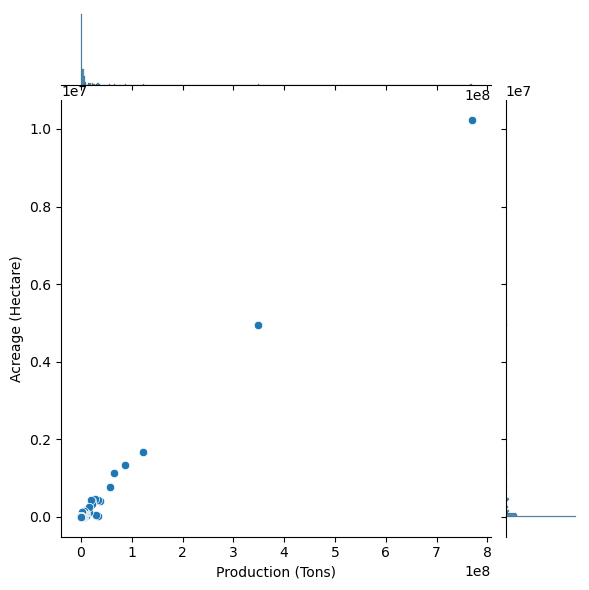

In [146]:

sns.jointplot( x= 'Production (Tons)', y = 'Acreage (Hectare)', data = file1)
plt.show()